# k_mean clustering

In [9]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('iris-full.csv')

#menghapus klom selain sepal lenght
df_filtered = df[['Class', 'sepal length']]

# Tampilkan 5 baris awal
print(df.head())


   id        Class  sepal length  sepal width  petal length  petal width
0   1  Iris-setosa           5.1          3.5           1.4          0.2
1   2  Iris-setosa           4.9          3.0           1.4          0.2
2   3  Iris-setosa           4.7          3.2           1.3          0.2
3   4  Iris-setosa           4.6          3.1           1.5          0.2
4   5  Iris-setosa           5.0          3.6           1.4          0.2


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load data dari CSV
df = pd.read_csv("iris-full.csv")  # Ganti dengan nama file kamu

# Simpan kolom ID dan Class
df_id_class = df[['id', 'Class']].copy()

# Ambil fitur numerik
X = df[['petal length', 'petal width']]

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan hasil klaster ke dataframe
df_id_class['Cluster'] = kmeans.labels_

# Mapping klaster ke label kelas berdasarkan majority vote
cluster_to_class = {}
for i in range(3):
    mode_class = df_id_class[df_id_class['Cluster'] == i]['Class'].mode()
    if not mode_class.empty:
        cluster_to_class[i] = mode_class[0]

# Buat kolom prediksi berdasarkan cluster
df_id_class['PredictedClass'] = df_id_class['Cluster'].map(cluster_to_class)

# Tandai data yang salah klasifikasi
df_id_class['Misclassified'] = df_id_class['Class'] != df_id_class['PredictedClass']

# -------------------------------
# Tampilkan semua data (ID 1–150)
print("=== Seluruh hasil clustering K-Means ===")
print(df_id_class.sort_values(by='id').to_string(index=False))

# -------------------------------
# Tampilkan data yang salah klasifikasi
salah = df_id_class[df_id_class['Misclassified']]
print("\n=== Data yang salah klasifikasi ===")
print(salah[['id', 'Class', 'Cluster', 'PredictedClass']].to_string(index=False))

# -------------------------------
# Tambahan: jumlah salah
print(f"\nTotal salah klasifikasi: {len(salah)} dari {len(df_id_class)} data")


=== Seluruh hasil clustering K-Means ===
 id           Class  Cluster  PredictedClass  Misclassified
  1     Iris-setosa        1     Iris-setosa          False
  2     Iris-setosa        1     Iris-setosa          False
  3     Iris-setosa        1     Iris-setosa          False
  4     Iris-setosa        1     Iris-setosa          False
  5     Iris-setosa        1     Iris-setosa          False
  6     Iris-setosa        1     Iris-setosa          False
  7     Iris-setosa        1     Iris-setosa          False
  8     Iris-setosa        1     Iris-setosa          False
  9     Iris-setosa        1     Iris-setosa          False
 10     Iris-setosa        1     Iris-setosa          False
 11     Iris-setosa        1     Iris-setosa          False
 12     Iris-setosa        1     Iris-setosa          False
 13     Iris-setosa        1     Iris-setosa          False
 14     Iris-setosa        1     Iris-setosa          False
 15     Iris-setosa        1     Iris-setosa          False

In [10]:
# Drop kolom class
df_no_label = df.drop(columns=['Class'])


## clistering

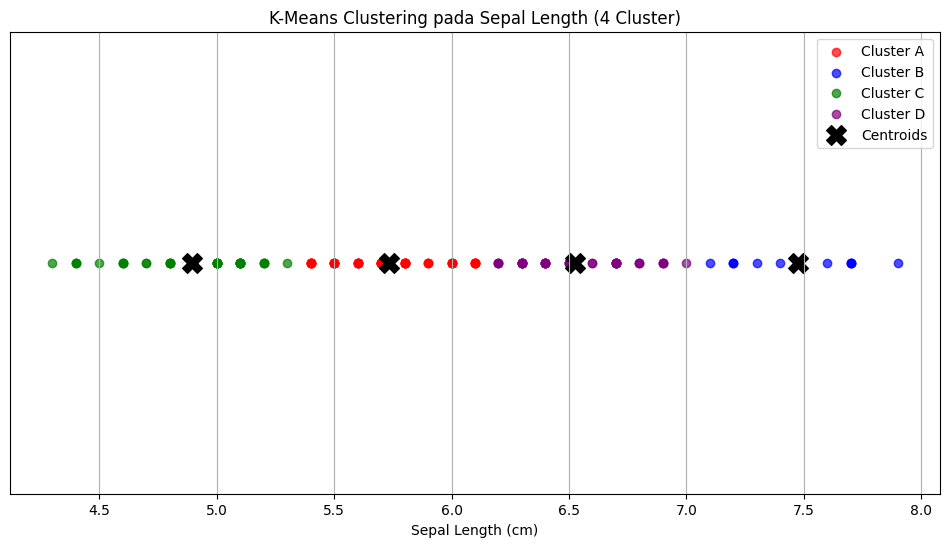


Statistik Deskriptif per Cluster:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
A         49.0  5.734694  0.228720  5.4  5.5  5.7  5.9  6.1
B         12.0  7.475000  0.270101  7.1  7.2  7.5  7.7  7.9
C         46.0  4.895652  0.246718  4.3  4.8  5.0  5.1  5.3
D         43.0  6.525581  0.232064  6.2  6.3  6.5  6.7  7.0

Contoh Data dengan Label Cluster:
   sepal length Cluster
0           5.1       C
1           4.9       C
2           4.7       C
3           4.6       C
4           5.0       C
5           5.4       A
6           4.6       C
7           5.0       C
8           4.4       C
9           4.9       C


In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv('iris-full.csv')

# 2. Ekstrak hanya kolom 'sepal length' sebagai array 2D
X = df[['sepal length']].values

# 3. Menentukan jumlah cluster = 4
n_clusters = 4

# 4. Membuat model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# 5. Mendapatkan label cluster dan konversi ke huruf (A, B, C, D)
numeric_labels = kmeans.labels_
letter_labels = [chr(65 + label) for label in numeric_labels]  # 65 = 'A' dalam ASCII

# 6. Menambahkan hasil clustering ke dataframe
df['Cluster'] = letter_labels

# 7. Visualisasi hasil clustering
plt.figure(figsize=(12, 6))

# Warna untuk setiap cluster
colors = ['red', 'blue', 'green', 'purple']

# Plot data points untuk setiap cluster
for i in range(n_clusters):
    cluster_data = X[numeric_labels == i]
    plt.scatter(cluster_data, np.zeros_like(cluster_data),
                color=colors[i], label=f'Cluster {chr(65 + i)}', alpha=0.7)

# Plot centroids
plt.scatter(kmeans.cluster_centers_, np.zeros(n_clusters),
            marker='X', s=200, c='black', label='Centroids')

plt.title('K-Means Clustering pada Sepal Length (4 Cluster)')
plt.xlabel('Sepal Length (cm)')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

# 8. Menampilkan statistik deskriptif per cluster
cluster_stats = df.groupby('Cluster')['sepal length'].describe()
print("\nStatistik Deskriptif per Cluster:")
print(cluster_stats)

# 9. Menampilkan 10 data pertama dengan label cluster
print("\nContoh Data dengan Label Cluster:")
print(df[['sepal length', 'Cluster']].head(10))

## menggabungkan data hasil cluster dengan data original

In [23]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Load data
df = pd.read_csv('iris-full.csv')

# 2. Ekstrak kolom 'sepal length'
X = df[['sepal length']].values

# 3. Clustering dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
df['Cluster'] = [chr(65 + label) for label in kmeans.labels_]  # Konversi ke A,B,C,D

# 4. GANTI kolom 'sepal length' asli dengan label cluster
df['sepal length'] = df['Cluster']  # Overwrite nilai numerik dengan kategori

# 5. Hapus kolom Cluster tambahan (opsional)
df.drop('Cluster', axis=1, inplace=True)

# 6. Simpan hasil (opsional)
df.to_csv('iris_sepal_length_categorical.csv', index=False)

# 7. Tampilkan hasil
print("Data setelah transformasi:")
print(df.head(10))

Data setelah transformasi:
   id        Class sepal length  sepal width  petal length  petal width
0   1  Iris-setosa            C          3.5           1.4          0.2
1   2  Iris-setosa            C          3.0           1.4          0.2
2   3  Iris-setosa            C          3.2           1.3          0.2
3   4  Iris-setosa            C          3.1           1.5          0.2
4   5  Iris-setosa            C          3.6           1.4          0.2
5   6  Iris-setosa            A          3.9           1.7          0.4
6   7  Iris-setosa            C          3.4           1.4          0.3
7   8  Iris-setosa            C          3.4           1.5          0.2
8   9  Iris-setosa            C          2.9           1.4          0.2
9  10  Iris-setosa            C          3.1           1.5          0.1


## clustering untuk clas sisa

In [26]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Load data
df = pd.read_csv('iris-full.csv')

# 2. Daftar kolom yang akan di-cluster
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
n_clusters = 4  # Jumlah cluster untuk setiap fitur

# 3. Lakukan clustering untuk setiap fitur
for feature in features:
    # Ekstrak data
    X = df[[feature]].values

    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Konversi label ke huruf (A, B, C, D)
    cluster_labels = [chr(65 + label) for label in kmeans.labels_]

    # Ganti kolom numerik dengan kategori cluster
    df[feature] = cluster_labels

# 4. Simpan hasil (opsional)
df.to_csv('iris_all_features_clustered.csv', index=False)

# 5. Tampilkan hasil
print("Data setelah transformasi:")
print(df.head(20))
print("\nDistribusi nilai per fitur:")
for feature in features:
    print(f"\n{feature}:")
    print(df[feature].value_counts())

Data setelah transformasi:
    id        Class sepal length sepal width petal length petal width
0    1  Iris-setosa            C           D            B           A
1    2  Iris-setosa            C           A            B           A
2    3  Iris-setosa            C           D            B           A
3    4  Iris-setosa            C           A            B           A
4    5  Iris-setosa            C           B            B           A
5    6  Iris-setosa            A           B            B           A
6    7  Iris-setosa            C           D            B           A
7    8  Iris-setosa            C           D            B           A
8    9  Iris-setosa            C           A            B           A
9   10  Iris-setosa            C           A            B           A
10  11  Iris-setosa            A           B            B           A
11  12  Iris-setosa            C           D            B           A
12  13  Iris-setosa            C           A            B      

## klasifikasi data kategori

menjelaskan proses diskritisasi menggunakan kmean pada data iris dan lakukan klasifikasi dengan model naive baiyes dan decision tree pada data yang sudah di diskritisasi dan data yang sebelum di diskritisasi